# Correlations

It is sometimes quite insightful to plot correlations using pairplots.

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

In [33]:
sns.set_theme() # we use seaborn for beautiful and simple plots

# Load the experimental data

In [34]:
instances = pd.read_json("./data/instances.json")
instances.sample(5)

,graph_id,vertices_amount,edges_amount,instance_type,instance
1728,1729,12,66,random,See sqllite database using graph_id
997,998,12,29,random,See sqllite database using graph_id
1590,1591,35,266,random,See sqllite database using graph_id
898,899,28,273,celestial,See sqllite database using graph_id
690,691,23,192,celestial,See sqllite database using graph_id


In [35]:
solutions = pd.read_json("./data/solutions.json")
solutions.sample(10)

,graph_id,solution_id,MS,TE,BE,solver_type,solver,solution_type,date,runtime,has_optimality_certificate,solution
17655,871,13470,1164.166091,10430.601153,607.617908,CP-2,CP-2 (BE),BE,2020-08-13 12:34:32.993242,900.040138,False,See sqlite database using solution_id
4214,163,34433,462.340536,2324.182529,299.390789,GA,GA (BE),BE,2020-08-13 12:34:32.993169,13.036704,False,See sqlite database using solution_id
26157,1321,33246,1641.309487,10825.017966,594.660209,GA,GA (TE),TE,2021-01-02 18:23:06.915056,233.359189,False,See sqlite database using solution_id
12401,594,34064,561.522158,6443.188490,482.724434,GA,GA (MS),MS,2020-08-13 12:34:18.111162,43.148416,False,See sqlite database using solution_id
27613,1421,29746,1050.140872,20158.392409,817.127515,ILS,ILS (MS),MS,2021-01-02 18:22:16.496881,25.306121,False,See sqlite database using solution_id
18889,936,11135,1344.372071,15983.064634,807.449580,Greedy,Greedy (BE),BE,2020-08-13 12:34:32.992929,0.268617,False,See sqlite database using solution_id
33612,1785,40623,1418.055459,7369.118737,599.779888,Greedy,Greedy (TE),TE,2021-01-08 17:56:30.870006,0.075636,False,See sqlite database using solution_id
21503,1040,39703,1182.441458,9292.628092,851.913233,APX,APX (TE),TE,2021-01-08 17:34:25.565144,0.503589,False,See sqlite database using solution_id
28816,1507,29416,1514.691310,20057.057040,1432.759541,APX,APX (MS),MS,2021-01-02 18:20:34.966504,4.069446,False,See sqlite database using solution_id
33231,1766,43365,734.179718,6171.483233,480.925755,GA,GA (BE),BE,2021-01-08 17:57:45.894755,44.197673,False,See sqlite database using solution_id


In [36]:
must_have_solvers = ["CP-1 (MS)", "GA (TE)"]
solvers_for_graph_id = solutions.groupby(["graph_id"])["solver"].unique()
def are_superset(s):
    return set(must_have_solvers).issubset(set(s))
graph_ids_to_consider = list(solvers_for_graph_id[solvers_for_graph_id.apply(are_superset)].index)

In [37]:
results = solutions.merge(instances, left_on="graph_id", right_on="graph_id")[["graph_id", "instance_type", "MS", "TE", "BE", "edges_amount", "vertices_amount"]]
results = results[results["graph_id"].isin(graph_ids_to_consider)]
results = results.groupby(["graph_id"]).min()
results

,instance_type,MS,TE,BE,edges_amount,vertices_amount
graph_id,,,,,,
1,celestial,273.032986,768.463967,164.595938,15,6
2,celestial,233.228700,821.139560,164.688861,15,6
3,celestial,256.079902,793.359902,152.924449,15,6
4,celestial,273.733500,675.098767,171.931792,14,6
5,celestial,250.127735,787.109527,171.124965,15,6
...,...,...,...,...,...,...
1781,random,472.722221,5534.582810,471.484523,136,17
1782,random,486.029525,6440.510276,473.940907,136,17
1783,random,489.507930,6375.568469,476.121014,136,17


In [38]:
results["Average degree"] = (2*results["edges_amount"])/results["vertices_amount"]

In [39]:
results.rename(columns={"instance_type": "Type", "edges_amount": "Number of edges", "vertices_amount": "Number of vertices", "MS": "Makespan", "TE": "Total Energy", "BE": "Bottleneck Energy"}, inplace=True)

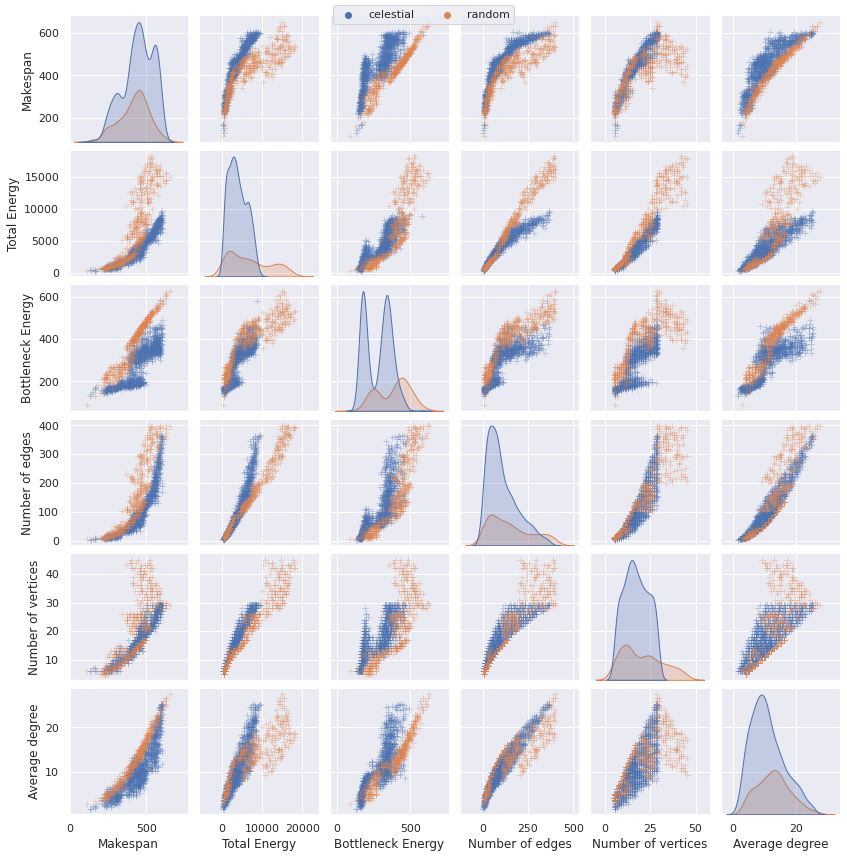

In [40]:
g = sns.pairplot(data=results, hue="Type",plot_kws=dict(marker="+", linewidth=1, alpha=0.3), corner=False, height=2)
g._legend.remove()
handles = g._legend_data.values()
labels = g._legend_data.keys()

g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=2)

#g.fig.subplots_adjust(top=0.98, bottom=0.08)
#plt.tight_layout()
#plt.legend(loc='upper right')
for ext in ["pdf", "png"]:
    plt.savefig(f"./output/plot_pairplot_instances.{ext}", dpi=300)
plt.show()